# Data Analysis

## Setup Environement

In [23]:
!pip install datasets

In [24]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

## Import dataset

The data we use comes from HuggingFace
The dataset holds 11,932 documents annotated with 3 labels:
* **Bearish = 0**
* **Bullish = 1**
* **Neutral = 2**

The data was collected using the Twitter API. The current dataset supports the multi-class classification task.

In [25]:
# HuggingFace
dataset = load_dataset("zeroshot/twitter-financial-news-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Train set visualization

In [26]:
# Convert the dictionary to a DataFrame
tweets_train = pd.DataFrame(dataset['train'])
tweets_train

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2


### Test set visualization

In [27]:
# Convert the dictionary to a DataFrame
tweets_test = pd.DataFrame(dataset['validation'])
tweets_test

,text,label
0,$ALLY - Ally Financial pulls outlook https://t...,0
1,"$DELL $HPE - Dell, HPE targets trimmed on comp...",0
2,$PRTY - Moody's turns negative on Party City h...,0
3,$SAN: Deutsche Bank cuts to Hold,0
4,$SITC: Compass Point cuts to Sell,0
...,...,...
2383,Stocks making the biggest moves midday: TD Ame...,2
2384,Stocks making the biggest moves premarket: Fit...,2
2385,Stocks making the biggest moves premarket: Hom...,2
2386,Stocks making the biggest moves premarket: TD ...,2


### Check `NaN` value

In [28]:
print("Number of NaN values for Train set")
tweets_train.isna().sum()

Number of NaN values for Train set


text     0
label    0
dtype: int64

In [29]:
print("Number of NaN values for Test set")
tweets_test.isna().sum()

Number of NaN values for Test set


text     0
label    0
dtype: int64

### Visulization of the distribution of the labels for train set and test set

#### Train set

In [30]:
tweets_train['label'].value_counts()

2    6178
1    1923
0    1442
Name: label, dtype: int64

Text(0, 0.5, 'Count')

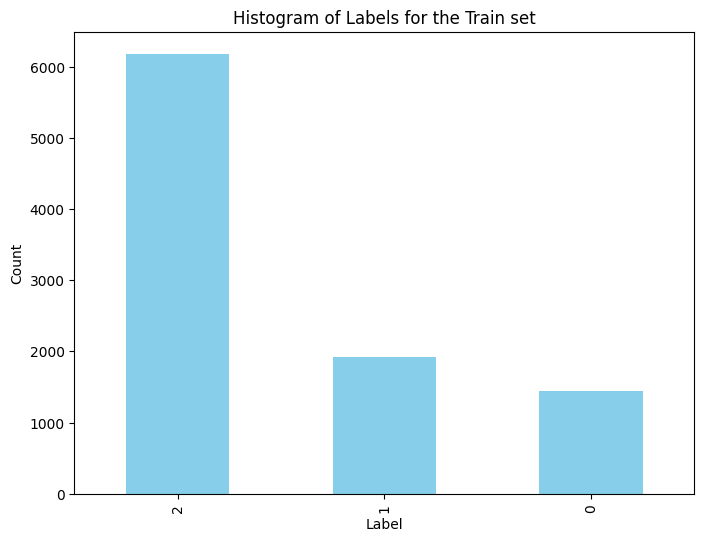

In [31]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
tweets_train['label'].value_counts().plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Histogram of Labels for the Train set')
plt.xlabel('Label')
plt.ylabel('Count')

We can see that the distribution of classes is unbalanced. Class 2, which corresponds to the "neural" label, is over-represented in our dataset. This imbalance can bias our prediction, so we are going to rebalance the dataset by selecting 500 elements for each class.

#### Test Set

In [32]:
tweets_test['label'].value_counts()

2    1566
1     475
0     347
Name: label, dtype: int64

Text(0, 0.5, 'Count')

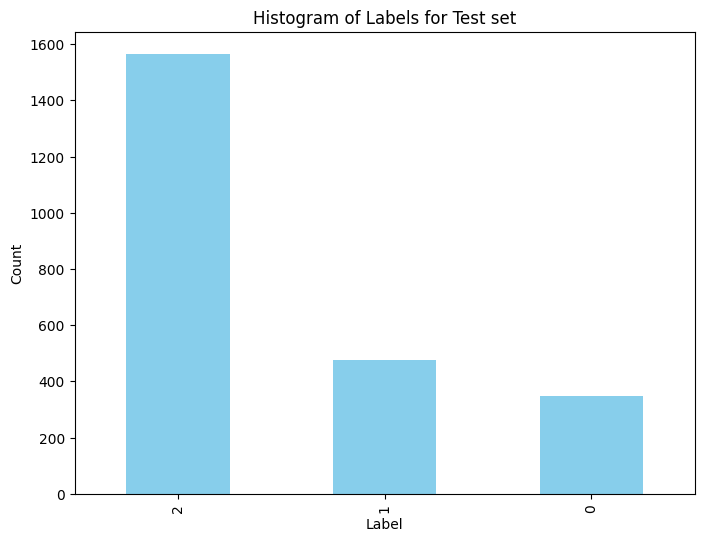

In [33]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
tweets_test['label'].value_counts().plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Histogram of Labels for Test set')
plt.xlabel('Label')
plt.ylabel('Count')

We can see that the test and train datasets share the same label distribution.

###Let's re-balence the Train dataset

In [34]:
# Get 500 rows for each label
df_label_0 = tweets_train[tweets_train['label'] == 0].sample(n=500, random_state=42)
df_label_1 = tweets_train[tweets_train['label'] == 1].sample(n=500, random_state=42)
df_label_2 = tweets_train[tweets_train['label'] == 2].sample(n=500, random_state=42)

# Concatenate the DataFrames
tweets_train = pd.concat([df_label_0, df_label_1, df_label_2], ignore_index=True)

# Shuffle the rows of the concatenated DataFrame
tweets_train = tweets_train.sample(frac=1, random_state=42).reset_index(drop=True)

tweets_train

,text,label
0,Keystone leak affected 10x more land than thou...,2
1,"Dybeck Happe, who joins $GE from A.P Moller-Ma...",2
2,Trump threatens China with higher tariffs if t...,0
3,Fed Report : Small-Business Sector Highly Vuln...,0
4,"Bitcoin sinks to lowest level since May, falli...",0
...,...,...
1495,Oaktree Strategic Income declares $0.155 dividend,2
1496,Highlight: Columbia Threadneedle Investments S...,2
1497,Why Fiverr Stock Rose 11% in January,1
1498,Do FDC's (NSE:FDC) Earnings Warrant Your Atten...,2


Text(0, 0.5, 'Count')

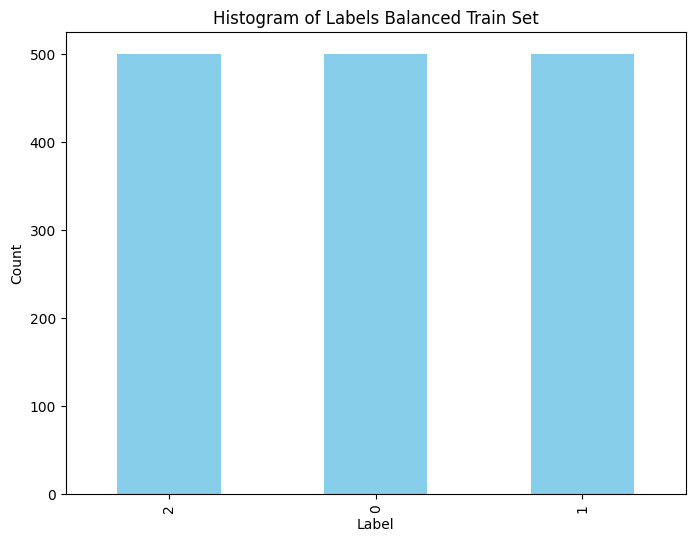

In [35]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
tweets_train['label'].value_counts().plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Histogram of Labels Balanced Train Set')
plt.xlabel('Label')
plt.ylabel('Count')

Export the dataframe to `.csv`

In [36]:
tweets_train[["text", "label"]].to_csv('train_finance_tweets_dataset.csv', index=False)